In [96]:
import astropy.io.fits as fits
import pylab as pl
import numpy as np

from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

In [104]:
lbglae = Table.read('/global/cscratch1/sd/mjwilson/secondary/sv1/raw/Mar21/LBG_LBGLAE.fits')

In [105]:
lbglae

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,FUV_err,NUV_err,MAG_ABS_FUV,MAG_ABS_NUV,MAG_ABS_u,MAG_ABS_uS,MAG_ABS_g,MAG_ABS_r,MAG_ABS_i,MAG_ABS_z,MAG_ABS_y,MAG_ABS_Yv,MAG_ABS_J,MAG_ABS_H,MAG_ABS_Ks,Z_SPEC,Z_BEST,NBAND_USED,CHI_BEST,CHI_STAR,CHI_QSO,MOD_BEST,MOD_STAR,MOD_QSO,Z_ML,Z_ML68_LOW,Z_ML68_HIGH,Z_SEC,Z_QSO,Z_BC03,ZPHOT,MOD_BEST_BC03,PRIORITY,TILEID,SAMPLE,TARGETID,SUBPRIORITY,PMRA,PMDEC,REF_EPOCH,OVERRIDE,U,U_ERR,US,US_ERR,G,G_ERR,R,R_ERR,I,I_ERR,Z,Z_ERR,Y,Y_ERR,YV,YV_ERR,J_ERR,H_ERR,KS,KS_ERR
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int32,bytes9,int64,float64,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4498320,150.1409476367925,2.829422083574351,0,71,True .. True,0.015745763522336302,-99.0,1.479,-20.86,-21.07,-21.382,-21.482,-21.735,-21.649,-21.742,-21.847,-21.902,-21.914,-21.952,-22.019,-21.745,-99.0,2.6592,12,7.70501,48.3812,13.8583,32,236,1,2.6363,2.5681,2.6954,-99.0,0.04,2.6363,2.6363,7,1000,11155,CLAUDS-BX,14168,0.6795929512645633,0.0,0.0,0.0,False,25.597,0.04,25.515,0.049,24.629,0.013,24.305,0.012,24.248,0.014,24.175,0.02,24.249,0.043,24.412,0.087,0.093,0.075,23.768,0.11
4191671,150.3176260446553,1.9030844910939728,0,127,True .. True,0.016520525744692857,-99.0,-99.0,-20.912,-21.054,-21.503,-21.607,-22.004,-21.969,-22.068,-22.178,-22.234,-22.245,-22.275,-22.35,-22.094,-99.0,2.3259,11,8.90807,140.262,37.3836,32,239,28,2.3293,2.2996,2.3605,-99.0,0.74,2.3293,2.3293,10,1000,11155,CLAUDS-BX,14019,0.28472539228913163,0.0,0.0,0.0,False,24.907,0.02,24.8,0.019,24.213,0.011,24.007,0.011,23.984,0.012,23.923,0.018,24.015,0.038,24.133,0.067,0.055,0.047,23.188,0.075
2544751,150.83389832859564,1.4591107511866326,0,7,True .. False,0.022914176705669226,-99.0,-99.0,-20.663,-21.044,-21.82,-21.967,-22.417,-22.659,-22.868,-23.043,-23.132,-23.156,-23.23,-23.376,-23.185,-99.0,2.1594,11,8.81609,73.4922,8.01255,32,49,26,2.2102,2.1455,2.2902,-99.0,2.34,2.2102,2.2102,10,1000,2068,CLAUDS-BX,14018,0.5352426532145999,0.0,0.0,0.0,False,25.169,0.028,24.946,0.039,24.336,0.016,24.136,0.021,23.87,0.02,23.698,0.027,23.504,0.054,-99.028,1000.0,1000.0,1000.0,-99.008,1000.0
2415924,151.07328684076285,1.0665682868063735,0,3,True .. False,0.021557274563012575,-99.0,-99.0,-21.196,-21.79,-22.473,-22.623,-23.128,-23.455,-23.73,-23.946,-24.059,-24.094,-24.221,-24.407,-24.24,-99.0,2.9004,11,1.33754,2.91461,5.38983,31,91,27,2.9068,2.8338,2.9964,-99.0,3.1,2.9068,2.9068,10,1000,2068,CLAUDS-BX,14017,0.4989290877626724,0.0,0.0,0.0,False,27.089,0.137,-99.101,1000.0,24.996,0.037,24.19,0.022,23.871,0.024,23.635,0.028,23.683,0.074,-99.026,1000.0,1000.0,1000.0,-99.008,1000.0
1561677,150.2937863599055,1.1129627220818596,0,7,True .. False,0.017156112587554638,-99.0,-99.0,-20.718,-20.976,-21.784,-21.986,-22.637,-23.006,-23.278,-23.47,-23.564,-23.593,-23.682,-23.873,-23.68,-99.0,2.2095,11,2.74881,31.3205,5.88161,30,238,4,2.2254,0.1135,2.3437,0.08,2.16,2.2254,2.2254,5,1000,2068,CLAUDS-BX,14016,0.1455622710075164,0.0,0.0,0.0,False,24.998,0.024,24.965,0.094,24.288,0.018,24.151,0.027,23.971,0.027,23.817,0.036,23.685,0.086,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
2514611,150.9339516734548,1.1720102721658336,0,7,True .. False,0.02206102575292699,-99.0,-99.0,-20.811,-20.832,-21.125,-21.238,-21.495,-21.522,-21.566,-21.642,-21.677,-21.677,-21.652,-21.696,-21.429,-99.0,2.299,11,1.39511,38.287,8.07477,23,246,28,2.2504,2.1467,2.3165,-99.0,0.58,2.2504,2.2504,10,1000,2068,CLAUDS-BX,14015,0.7030696085057238,0.0,0.0,0.0,False,24.506,0.017,24.323,0.059,24.192,0.016,24.176,0.025,24.155,0.03,24.147,0.049,24.054,0.106,-99.027,1000.0,1000.0,1000.0,-99.008,1000.0
2595560,150.7211247945260

In [106]:
np.all(lbglae['SAMPLE'][lbglae['U'] < 0.0] == 'CLAUDS-G')

True

In [107]:
master = Table.read('/global/cfs/cdirs/desi/target/secondary/sv1/indata/LBG_TOMOG.fits')

In [108]:
master

RA,DEC,PMRA,PMDEC,REF_EPOCH,OVERRIDE,U,U_ERR,G,G_ERR,R,R_ERR,PHOTO_Z
float64,float64,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64
35.14683498308203,-5.677133465145509,0.0,0.0,0.0,False,27.508825878032372,0.213,23.58,0.045,22.502,0.021,3.5612
36.6801259954748,-4.458424303863403,0.0,0.0,0.0,False,22.848296015322322,0.005,22.318,0.007,22.511,0.03,0.0879
34.56350776935839,-4.918475112893407,0.0,0.0,0.0,False,25.088915372146978,0.121,23.029,0.046,22.512,0.052,0.1942
35.66785353554422,-4.862779895621046,0.0,0.0,0.0,False,23.200695198295424,0.007,22.6,0.007,22.513,0.015,2.524
35.39549680117322,-5.959109072112367,0.0,0.0,0.0,False,24.645524422119873,0.559,22.867,0.172,22.514,0.181,0.2311
36.95019910227519,-4.821813627871857,0.0,0.0,0.0,False,28.67563348253894,8.727,23.189,0.141,22.514,0.205,3.3215
35.21678967195274,-5.78475779472435,0.0,0.0,0.0,False,27.496810438647078,0.088,23.26,0.012,22.521,0.008,3.4395
37.16342125512937,-5.177479459022176,0.0,0.0,0.0,False,24.370627302606355,0.003,22.866,0.014,22.521,0.01,3.1075
37.175986509794384,-4.03898982168927,0.0,0.0,0.0,False,23.67785260899144,0.025,22.761,0.01,22.521,0.015,0.1291


In [109]:
master_cosmos = master[master['RA'] > 140.]

In [110]:
len(master), len(master_cosmos)

(28294, 11967)

(148.5, 151.5)

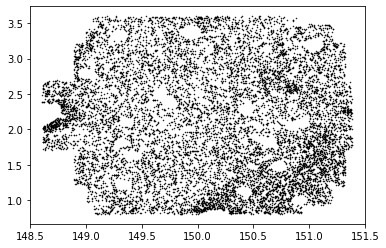

In [111]:
pl.plot(master_cosmos['RA'], master_cosmos['DEC'], marker='.', lw=0., c='k', markersize=1)
pl.xlim(148.5, 151.5)

(148.5, 151.5)

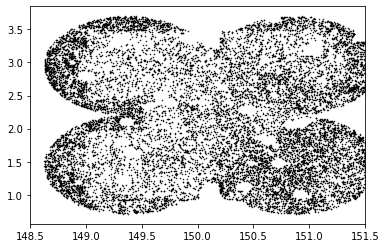

In [112]:
pl.plot(lbglae['RA'], lbglae['DEC'], marker='.', lw=0., c='k', markersize=1)
pl.xlim(148.5, 151.5)

In [113]:
master_cosmos.sort('RA')

In [114]:
lbglae.sort('RA')

In [115]:
master_cosmos.pprint()

        RA                DEC         PMRA PMDEC ... G_ERR   R    R_ERR PHOTO_Z
------------------ ------------------ ---- ----- ... ----- ------ ----- -------
 148.6052048858105 2.3869668555602086  0.0   0.0 ... 0.006 23.934 0.009  0.8247
 148.6087457488662  2.380472272566467  0.0   0.0 ... 0.014 24.319 0.019  0.1547
 148.6102123290186  2.479105993095154  0.0   0.0 ... 0.005  23.31 0.005  1.6531
148.61054811618905  2.576660499646323  0.0   0.0 ...  0.04  23.64 0.033  2.5458
148.61118713296352  1.815563890836122  0.0   0.0 ... 0.054 24.308 0.042  3.0665
148.61145222138697  1.817863614710544  0.0   0.0 ... 0.044 24.127 0.038  2.4445
  148.611767980607 2.6233604080779536  0.0   0.0 ... 0.103 24.138 0.058  3.2715
 148.6125390165899  2.522367895758604  0.0   0.0 ... 0.042  23.81 0.042  2.8275
148.61310785687996 2.5790987253036155  0.0   0.0 ... 0.071 24.271 0.067  1.9077
148.61357305484626  2.571985824372332  0.0   0.0 ...  0.05 24.287 0.049  1.9767
               ...                ...  .

In [116]:
lbglae['ID', 'RA', 'DEC'].pprint()

   ID           RA                DEC        
------- ------------------ ------------------
3406748  148.6255029521841  1.432135360930508
1482783 148.62767090532938 1.5037119165385382
 404809 148.62862763716578  3.046637944673884
 402315 148.62877380999976    3.0045486052021
 399517  148.6289862756848 2.9855856556812665
1477678 148.62919122066273 1.4412300308150068
1481690 148.62964446167797 1.4902834375268077
 398612 148.63046396729948  2.973926459749743
 392485 148.63055969636596  2.890567055105118
 405080   148.631129447463 3.0399248813688344
    ...                ...                ...
2231716  151.6027818919808 1.4506093265311095
2225657 151.60281955848228  1.339233082195318
1130198 151.60444470992547  2.958562015177429
1139764 151.60538775004602 3.0124697218583467
2228235  151.6095443384644  1.398806439582308
1136908  151.6098424976461 3.0442813650544203
2234608 151.61113479557292  1.494724532473935
1124454 151.61221439252532  2.897232523250536
2231980 151.61377256907372  1.4539

In [117]:
SC_master_cosmos = SkyCoord(ra=master_cosmos['RA']*u.degree, dec=master_cosmos['DEC']*u.degree)
SC_lbglae = SkyCoord(ra=lbglae['RA']*u.degree, dec=lbglae['DEC']*u.degree)

idx, d2d, d3d = SC_master_cosmos.match_to_catalog_sky(SC_lbglae)

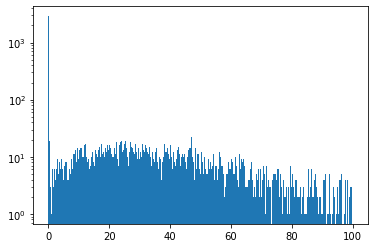

In [118]:
pl.hist(d2d.arcsec, bins=np.arange(0.0, 100., 0.1))
pl.yscale('log')

In [119]:
np.count_nonzero(d2d.arcsec < 1.0) / len(d2d)

0.2580429514498203

In [120]:
# Now idx are indices into catalog that are the closest objects to each of the coordinates in c; c.match_to_catalog_sky(catalog)
len(idx), len(SC_master_cosmos)

(11967, 11967)

In [121]:
matched = master_cosmos[d2d.arcsec < 1.0]
unmatched = master_cosmos[d2d.arcsec > 1.0]

In [122]:
matched

RA,DEC,PMRA,PMDEC,REF_EPOCH,OVERRIDE,U,U_ERR,G,G_ERR,R,R_ERR,PHOTO_Z
float64,float64,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64
148.7975786613489,2.542071500102984,0.0,0.0,0.0,False,28.96219007620806,2.137,25.351,0.064,24.243,0.029,3.5396
148.81214223376907,1.9109010943939448,0.0,0.0,0.0,False,29.63096682283639,9.984,24.239,0.053,23.24,0.024,3.4349
148.8804495298657,1.7766107864679173,0.0,0.0,0.0,False,27.990948303930974,1.152,25.148,0.06,24.167,0.028,3.3269
148.89154095860178,2.9676436048119905,0.0,0.0,0.0,False,25.776,0.351,24.499,0.028,24.265,0.024,0.1141
148.8920652694291,3.043124955359642,0.0,0.0,0.0,False,27.228,1.83,24.885,0.048,24.338,0.032,2.7852
148.89251437622502,2.8444195695577505,0.0,0.0,0.0,False,26.47,0.756,24.315,0.025,23.639,0.015,2.9113
148.89414240224443,2.95836640050518,0.0,0.0,0.0,False,27.075,1.07,24.801,0.042,24.207,0.027,3.0443
148.8981068410274,2.9712071687255315,0.0,0.0,0.0,False,26.8,0.662,24.256,0.024,23.699,0.016,3.1876
148.89813218441523,1.2864763110479562,0.0,0.0,0.0,False,25.363,0.33,24.146,0.027,23.777,0.024,2.6283


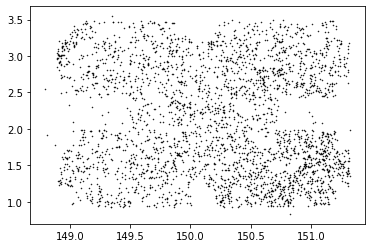

In [123]:
pl.plot(matched['RA'], matched['DEC'], marker='.', lw=0.0, c='k', markersize=1)

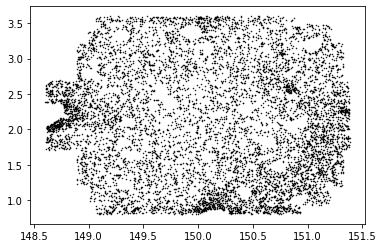

In [124]:
pl.plot(unmatched['RA'], unmatched['DEC'], marker='.', lw=0.0, c='k', markersize=1)

(-0.5, 3.5)

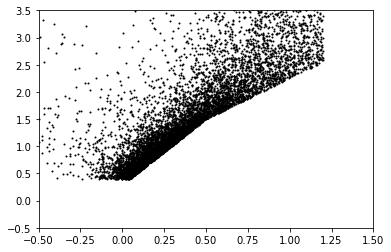

In [125]:
pl.plot(unmatched['G'] - unmatched['R'], unmatched['U'] - unmatched['G'], marker='.', lw=0.0, c='k', markersize=2)

pl.xlim(-0.5, 1.5)
pl.ylim(-0.5, 3.5)

(-0.5, 3.5)

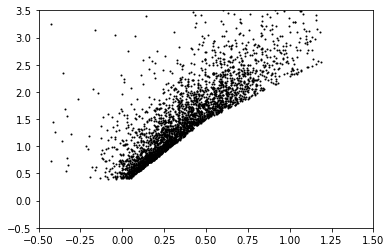

In [126]:
pl.plot(matched['G'] - matched['R'], matched['U'] - matched['G'], marker='.', lw=0.0, c='k', markersize=2)

pl.xlim(-0.5, 1.5)
pl.ylim(-0.5, 3.5)

In [127]:
matched_lbglae   = lbglae[idx][d2d.arcsec < 1.0]
unmatched_lbglae = lbglae[~np.isin(lbglae['ID'], matched_lbglae['ID'])]

In [128]:
matched_lbglae.pprint()

   ID           RA                DEC         MASK ... H_ERR     KS   KS_ERR
------- ------------------ ------------------ ---- ... ------ ------- ------
3376608  148.7975778525742 2.5420774184971107    0 ... 1000.0 -99.012 1000.0
3336690 148.81212521940824 1.9109119518075528    0 ... 1000.0 -99.008 1000.0
3210036  148.8804456533988 1.7766060546869695    0 ... 1000.0 -99.007 1000.0
 260057  148.8915473653417 2.9676613880472016    0 ... 1000.0 -99.007 1000.0
 265168 148.89206187747578 3.0431223347284435    0 ... 1000.0 -99.007 1000.0
3301330 148.89251397882134 2.8444195444641385    0 ... 1000.0 -99.009 1000.0
 259046 148.89414205538725 2.9583705033319303    0 ... 1000.0 -99.007 1000.0
 260439  148.8981057613005  2.971203208673214    0 ... 1000.0 -99.007 1000.0
1406495 148.89811652371162  1.286500224805362    0 ... 1000.0 -99.008 1000.0
3305150 148.90162493225208  3.016928160640889    0 ... 1000.0 -99.007 1000.0
    ...                ...                ...  ... ...    ...     ...    ...

In [129]:
unmatched_lbglae.pprint()

   ID           RA                DEC         MASK ... H_ERR     KS   KS_ERR
------- ------------------ ------------------ ---- ... ------ ------- ------
3406748  148.6255029521841  1.432135360930508    0 ... 1000.0 -99.008 1000.0
1482783 148.62767090532938 1.5037119165385382    0 ... 1000.0 -99.008 1000.0
 404809 148.62862763716578  3.046637944673884    0 ... 1000.0 -99.011 1000.0
 402315 148.62877380999976    3.0045486052021    0 ... 1000.0 -99.012 1000.0
 399517  148.6289862756848 2.9855856556812665    0 ... 1000.0 -99.013 1000.0
1477678 148.62919122066273 1.4412300308150068    0 ... 1000.0 -99.008 1000.0
1481690 148.62964446167797 1.4902834375268077    0 ... 1000.0 -99.008 1000.0
 398612 148.63046396729948  2.973926459749743    0 ... 1000.0 -99.013 1000.0
 392485 148.63055969636596  2.890567055105118    0 ... 1000.0 -99.014 1000.0
 405080   148.631129447463 3.0399248813688344    0 ... 1000.0 -99.011 1000.0
    ...                ...                ...  ... ...    ...     ...    ...

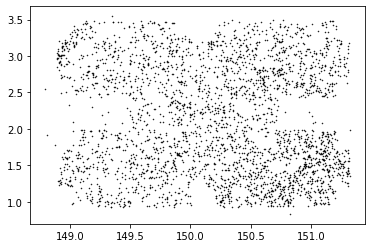

In [130]:
pl.plot(matched_lbglae['RA'], matched_lbglae['DEC'], marker='.', lw=0.0, c='k', markersize=1)

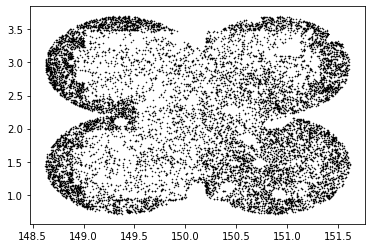

In [131]:
pl.plot(unmatched_lbglae['RA'], unmatched_lbglae['DEC'], marker='.', lw=0.0, c='k', markersize=1)

In [134]:
np.unique(matched_lbglae['SAMPLE'], return_counts=True)

(<Column name='SAMPLE' dtype='bytes9' length=3>
 CLAUDS-BX
  CLAUDS-G
  CLAUDS-U,
 array([1265,   27, 1796]))

In [135]:
np.unique(lbglae['SAMPLE'], return_counts=True)

(<Column name='SAMPLE' dtype='bytes9' length=3>
 CLAUDS-BX
  CLAUDS-G
  CLAUDS-U,
 array([4966, 7076, 3676]))

(-0.5, 3.5)

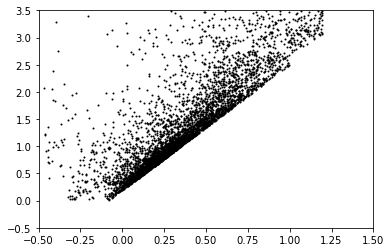

In [136]:
isin = unmatched_lbglae['SAMPLE'] != 'CLAUDS-G'

pl.plot(unmatched_lbglae['G'][isin] - unmatched_lbglae['R'][isin], unmatched_lbglae['U'][isin] - unmatched_lbglae['G'][isin], marker='.', lw=0.0, c='k', markersize=2)
pl.xlim(-0.5, 1.5)
pl.ylim(-0.5, 3.5)

(-0.5, 3.5)

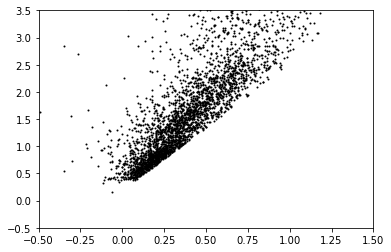

In [137]:
isin = matched_lbglae['SAMPLE'] != 'CLAUDS-G'

pl.plot(matched_lbglae['G'][isin] - matched_lbglae['R'][isin], matched_lbglae['U'][isin] - matched_lbglae['G'][isin], marker='.', lw=0.0, c='k', markersize=2)

pl.xlim(-0.5, 1.5)
pl.ylim(-0.5, 3.5)

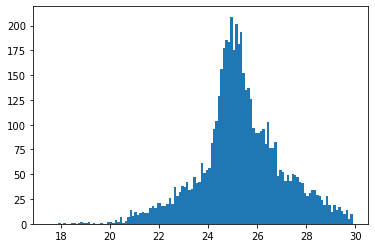

In [138]:
isin = unmatched_lbglae['SAMPLE'] != 'CLAUDS-G'
_    = pl.hist(unmatched_lbglae['U'][isin], bins=np.arange(17.5, 30.0, 0.1))

In [160]:
isin = (unmatched_lbglae['SAMPLE'] != 'CLAUDS-G')

# len(unmatched_lbglae[isin])

(-0.5, 3.5)

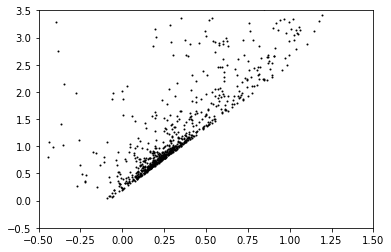

In [161]:
isin = (unmatched_lbglae['SAMPLE'] != 'CLAUDS-G') & (unmatched_lbglae['FLAG_FIELD_BINARY'][:,2] == False)

pl.plot(unmatched_lbglae['G'][isin] - unmatched_lbglae['R'][isin], unmatched_lbglae['U'][isin] - unmatched_lbglae['G'][isin], marker='.', lw=0.0, c='k', markersize=2)

pl.xlim(-0.5, 1.5)
pl.ylim(-0.5, 3.5)

In [162]:
isin = unmatched_lbglae['SAMPLE'] != 'CLAUDS-G'

np.count_nonzero(unmatched_lbglae['R'][isin] < 22.5), len(unmatched_lbglae['R'][isin])

(788, 5592)

In [164]:
matched_lbglae.write('/global/cscratch1/sd/mjwilson/DESILBG/tomog/lbglae-matches.fits', format='fits', overwrite=True)